In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Loading in the cleaned Data
wBios = pd.read_csv('./mockData/mockData.csv')
noBios = pd.read_csv('./mockData/profilesNoBio.csv')
# wBios.head()
# noBios.head()

,Unnamed: 0,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer
0,0,4,8,3,1,4,1,2,1,7,3,2
1,1,3,3,1,2,8,1,1,2,4,2,1
2,2,1,7,2,2,2,10,1,3,11,2,2
3,3,4,5,1,1,8,3,2,2,6,3,2
4,4,2,4,2,1,3,9,2,2,7,1,2


In [5]:
#initialize the scaler for wBios
scaler = MinMaxScaler() #scales each feature in a give range 0, 1
wBiosScale1 = wBios[['Bios']].join(
              pd.DataFrame(
          scaler.fit_transform(
                               wBios.drop(columns =['Bios'],axis = 1)),  
                               index=wBios.index))
wBiosScale1.head()
#realization: the scaling is also scaling the headers
#for some reason the entire year column is very low values, which does not seem accurate

,Bios,0,1,2,3,4,5,6,7,8,9,10,11
0,Friendly web ninja. Zombie practitioner. General travel lover. Reader.,0.000000,1.000000,0.428571,0.0,0.0,0.222222,0.111111,0.0,0.0,0.0,0.5,1.0
1,Hipster-friendly thinker. Food expert. Travel guru. Bacon practitioner. Introvert. Amateur zombie enthusiast.,0.001855,0.333333,0.714286,0.5,1.0,0.111111,0.666667,1.0,0.0,1.0,0.0,0.0
2,Communicator. Unable to type with boxing gloves on. Typical web scholar. Tv lover.,0.003711,0.333333,0.857143,1.0,1.0,0.000000,0.555556,0.0,0.5,0.3,0.5,0.0
3,Infuriatingly humble bacon enthusiast. Amateur beer maven. General tv practitioner. Web ninja.,0.005566,0.666667,0.714286,1.0,1.0,0.444444,0.111111,1.0,0.5,0.9,1.0,0.0
4,Unapologetic internet lover. Baconaholic. Proud social media ninja. Food nerd. Award-winning twitter practitioner.,0.007421,0.666667,0.285714,0.0,0.0,0.777778,0.666667,0.0,0.5,0.9,1.0,0.0


In [45]:
#scaling without the minmax scaler 
scaler = MinMaxScaler()
# print(noBios.head())
noBiosScaler1 = pd.DataFrame(noBios)
noBiosScaler1.drop(noBiosScaler1.columns[[0]], axis = 1, inplace= True)
# print(noBiosScaler1.head())
noBiosScaler1 = pd.DataFrame(scaler.fit_transform(noBios))
print(noBiosScaler1)


           0         1         2    3    4         5         6    7    8   \
0    0.000000  1.000000  1.000000  1.0  0.0  0.333333  0.000000  1.0  0.0   
1    0.001484  0.666667  0.285714  0.0  1.0  0.777778  0.000000  0.0  0.5   
2    0.002967  0.000000  0.857143  0.5  1.0  0.111111  1.000000  0.0  1.0   
3    0.004451  1.000000  0.571429  0.0  0.0  0.777778  0.222222  1.0  0.5   
4    0.005935  0.333333  0.428571  0.5  0.0  0.222222  0.888889  1.0  0.5   
..        ...       ...       ...  ...  ...       ...       ...  ...  ...   
670  0.994065  0.000000  0.571429  0.0  1.0  0.444444  0.888889  1.0  1.0   
671  0.995549  1.000000  0.000000  0.5  1.0  0.555556  0.222222  0.0  1.0   
672  0.997033  0.333333  0.428571  0.5  0.0  0.222222  0.888889  1.0  0.5   
673  0.998516  0.666667  0.285714  0.5  1.0  0.000000  0.666667  1.0  0.5   
674  1.000000  1.000000  0.428571  0.0  1.0  0.333333  0.444444  0.0  1.0   

      9    10   11  
0    0.6  1.0  1.0  
1    0.3  0.5  0.0  
2    1.0  0.

In [27]:
# Instantiating the Vectorizer, experimenting with both
vectorizer = CountVectorizer()
# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(wBiosScale1['Bios'])

# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

# Concating the words DF with the original DF
wBiosS1V1 = pd.concat([wBiosScale1, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
wBiosS1V1.drop('Bios', axis=1, inplace=True)

In [ ]:
vectorizer = TfidfVectorizer()

In [29]:
wBiosS1V1.head()

,0,1,2,3,4,5,6,7,8,9,...,type,typical,unable,unapologetic,wannabe,web,winning,with,writer,zombie
0,0.000000,1.000000,0.428571,0.0,0.0,0.222222,0.111111,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0.001855,0.333333,0.714286,0.5,1.0,0.111111,0.666667,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0.003711,0.333333,0.857143,1.0,1.0,0.000000,0.555556,0.0,0.5,0.3,...,1,1,1,0,0,1,0,1,0,0
3,0.005566,0.666667,0.714286,1.0,1.0,0.444444,0.111111,1.0,0.5,0.9,...,0,0,0,0,0,1,0,0,0,0
4,0.007421,0.666667,0.285714,0.0,0.0,0.777778,0.666667,0.0,0.5,0.9,...,0,0,0,1,0,0,1,0,0,0


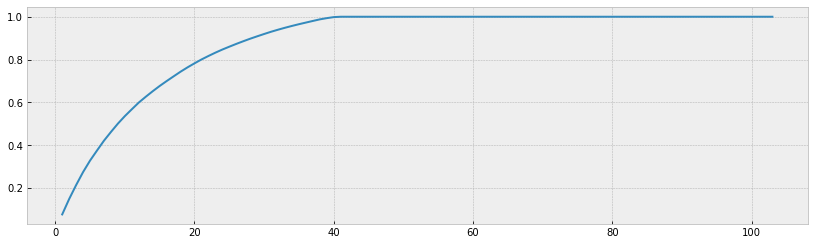

Number features: 33
Total Variance Explained: 0.9571238056590256
0.9486290109178138


In [30]:
#PCA: principal component analysis (PCA) is a technique used to emphasize variation and bring out the strong patterns in a dataset
#used to help make data easy for visualization, reduces the dimensionality of the dataset

from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
wBiosS1V1_pca = pca.fit_transform(wBiosS1V1)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,wBiosS1V1.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = wBiosS1V1.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
wBiosS1V1_pca = pca.fit_transform(wBiosS1V1)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

In [37]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 60, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(wBiosS1V1_pca)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    #k_means = KMeans(n_clusters=i)
    
    #k_means.fit(wBiosS1V1_pca)
    
    #cluster_assignments = k_means.predict(wBiosS1V1_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(wBiosS1V1_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(wBiosS1V1_pca, cluster_assignments))

Max Value:
Cluster #     Cluster Score
30       0.563868

Min Value:
Cluster #    Cluster Score
2       0.087252


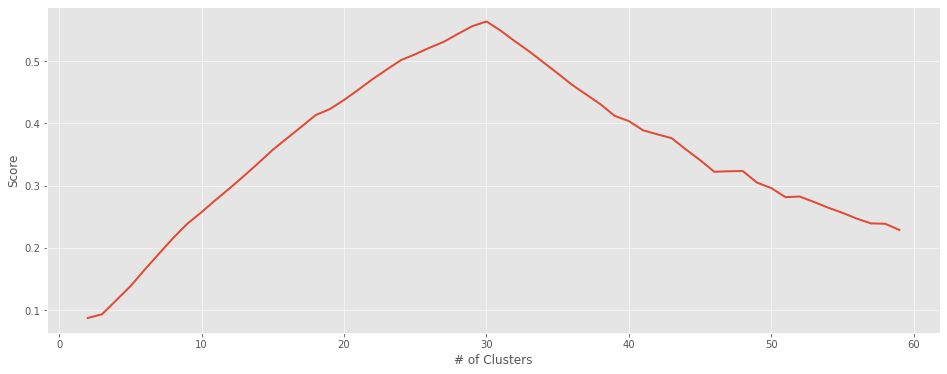

Max Value:
Cluster #    Cluster Score
2       3.407695

Min Value:
Cluster #     Cluster Score
30       0.666818


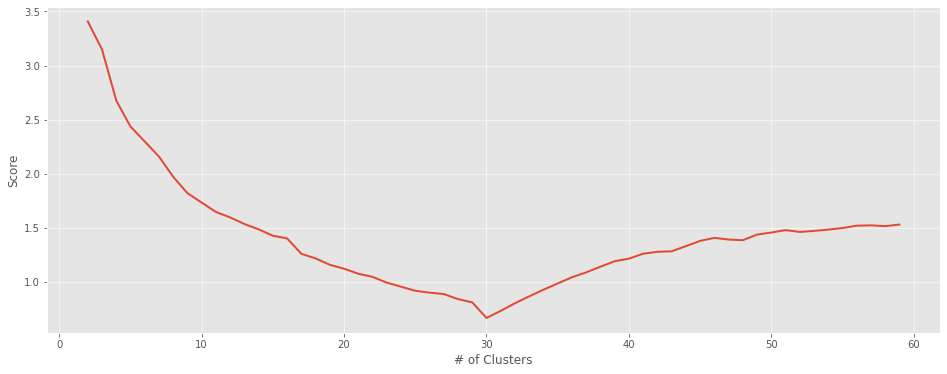

In [38]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [43]:
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(wBiosS1V1_pca )

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
df = wBios[['Bios']].join(pd.DataFrame(scaler.inverse_transform(wBios.drop('Bios', axis=1)), columns=wBios.columns[1:], index=wBios.index))

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

ValueError: columns overlap but no suffix specified: Index(['Bios'], dtype='object')